## import library

In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## open csv file as pandas dataframe

In [2]:
signal_df = pd.read_csv('signal_new.csv').drop('entry', axis=1)

In [3]:
background_df = pd.read_csv('background_new.csv').drop('entry', axis=1)

## label 

In [4]:
signal_label = np.ones(398263)
signal_df['label'] = signal_label

In [5]:
background_df['label']=np.zeros(137269)

## dataset sumup

In [6]:
dataset_df = pd.concat([signal_df,background_df], ignore_index=True)
dataset_df

,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,dEtabb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
0,128.748718,1.266521,7,2,135.384552,-0.805419,-0.574222,222.708755,1.975177,0.907259,...,2.923688,2.859488,5.701911,29.570999,0.633291,2.527016,36.154144,0.750850,0.563677,1.0
1,323.834320,1.221307,8,4,78.824593,-1.744408,-0.241483,398.609894,2.956917,1.084536,...,1.669306,0.536129,5.549069,23.957195,-4.069767,2.107588,701.493103,0.054843,0.040889,1.0
2,288.848236,0.858359,4,3,82.293976,1.627124,1.730240,361.573914,2.707124,0.015462,...,0.954234,1.812456,4.562911,28.454098,1.619449,-1.027924,74.807343,0.728906,0.884353,1.0
3,107.835846,0.050859,4,3,17.217613,-3.646276,-2.009611,347.376099,2.877990,0.090561,...,3.567277,2.119354,3.452726,16.632441,-0.966053,-1.661778,25.253466,0.046178,-1.000000,1.0
4,248.304901,0.958807,7,3,28.405352,1.845880,-0.232091,264.869232,3.197687,1.355985,...,1.064546,0.832365,10.167414,50.971561,1.470771,-2.602962,117.226265,0.663049,0.088564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535527,667.028137,1.109031,11,0,157.071304,1.240662,2.938507,729.059326,2.864907,1.235375,...,0.315239,1.585665,6.828758,27.807114,-0.200469,-1.394060,29.178085,0.006265,0.069917,0.0
535528,419.362488,1.109031,9,3,156.225861,1.433436,1.757243,543.777222,2.527981,0.043883,...,0.575097,2.420889,15.599944,76.274765,2.903633,-1.856060,697.902283,0.027318,0.135313,0.0
535529,607.648499,1.189336,9,1,263.931030,1.292060,-2.004730,797.593994,2.442989,0.616640,...,1.081903,1.396448,18.860130,143.125443,1.419641,0.369972,313.828522,0.019559,0.061828,0.0
535530,435.928528,1.266521,10,3,185.856598,-2.017686,-2.084546,834.221619,2.354301,0.451738,...,1.524903,1.770393,8.116883,44.363911,-1.131178,2.052008,76.338470,0.010020,0.319553,0.0


In [7]:
dataset_df['label'].value_counts()

1.0    398263
0.0    137269
Name: label, dtype: int64

## Explore dataset

In [ ]:
parameter = ['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4', 'label']

### histrogram density 

In [ ]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

palette ={0.0: "C0", 1.0: "C1"}

for param, ax in zip(parameter, axs.ravel()):

    sns.histplot(ax=ax,  data=dataset_df, x=param, weights='weight', bins=100, common_bins=False, stat='density', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    ax.set_title(param)
    #ax.set_ylabel('density')
    #ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_density.png')

In [ ]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

palette ={0.0: "C0", 1.0: "C1"}

for param, ax in zip(parameter, axs.ravel()):

    sns.histplot(ax=ax,  data=dataset_df, x=param, weights='weight', bins=100, common_bins=False, stat='probability', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    ax.set_title(param)
    #ax.set_ylabel('density')
    #ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_probability.png')

### histrogram yscale=log density

In [ ]:
fig1, axs1 = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

for param, ax in zip(parameter, axs1.ravel()):
    
    ax.hist([signal_df[param], background_df[param]], bins=100, density=True, weights=[signal_df['weight'],background_df['weight']], histtype='step', label=['signal','background'])
    ax.set_title(param)
    ax.set_yscale('log')
    ax.set_ylabel('density')
    ax.legend()
    
fig.tight_layout()
plt.savefig('histrogram_yscale=log_density.png')

### boxplot of signal (400k events) & background (100k events)

In [ ]:
sns.set()

fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(50,50))

for param, ax in zip(parameter, axs.ravel()):
    
    sns.boxplot(ax=ax, x='label', y=param, data=dataset_df)

    ax.set_title(param)

#plt.savefig('boxplots.png')

In [ ]:
dataset_df.columns

## Scaling 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Standardize 

In [9]:
scaler = StandardScaler()
data_for_scaling = dataset_df.values[:,:-1]
dataset_st_np = scaler.fit_transform(data_for_scaling)
dataset_st_df = pd.DataFrame(dataset_st_np, columns=['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4'])

In [10]:
dataset_st_df['label'] = dataset_df['label']

### Normalize 

In [ ]:
scaler1 = MinMaxScaler()
data_for_scaling1 = dataset_df.iloc[:,:-1].to_numpy()
dataset_mm_np = scaler.fit_transform(data_for_scaling)
dataset_mm_df = pd.DataFrame(dataset_mm_np, columns=['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4'])

In [ ]:
dataset_mm_df['label']=dataset_df['label']

# input columns

In [11]:
#input_columns = ['ptbb','ebb','mbb','etabb','phibb','ptj1','ej1','etaj1','btagj1','ptj2','ej2','etaj2','btagj2']
input_columns = ['mbb','nbjets','dEtabb','ej1','ej2','btagj2','qglikelihoodj2','mj3','btagj3','mj4']

### Splitting data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def TrainTestSplit(dataset):
    return train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['label'].to_numpy())

In [14]:
train_df, test_df = TrainTestSplit(dataset_st_df)

In [15]:
X_test = test_df[input_columns]
y_test = test_df['label']

In [16]:
train_df['label'].value_counts()

1.0    278784
0.0     96088
Name: label, dtype: int64

In [17]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
X_train = undersampled_train[input_columns]
y_train = undersampled_train['label']

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [19]:
# Instantiate a sequential model
model = Sequential()

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

# Add input and hidden layer
model.add(Dense(100, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())

# Add output layer, use sigmoid
model.add(Dense(1, activation='sigmoid'))

#Compile
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy','AUC']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,801
Trainable params: 6,501
Non-trainable params: 300
_________________________________________________________________


In [20]:
undersampled_train

,mbb,weight,njets,nbjets,ptbb,etabb,phibb,ebb,dRbb,dEtabb,...,dEta23,dPhi23,mj4,ptj4,etaj4,phij4,ej4,btagj4,qglikelihoodj4,label
402262,0.716680,0.698025,-0.824846,0.648749,0.775768,1.444042,-0.784538,2.508213,-0.545670,-1.155698,...,-0.357880,-0.972323,5.380040,4.000624,1.014411,0.970396,1.563466,0.868910,1.010645,0.0
494298,0.763899,0.661539,-0.454698,-1.399934,-0.389484,-1.417407,-1.320024,0.720627,0.546582,0.227391,...,-0.368412,-0.115460,-0.692471,-0.410637,1.383940,-0.970895,0.144576,-0.342941,-1.467537,0.0
410139,-0.572105,-0.458590,4.727365,-0.375592,-0.702809,-0.224554,0.225253,-0.792168,1.202161,1.895148,...,-0.160866,-0.307422,0.171932,0.077541,-1.150294,-1.378714,0.098751,-0.570783,0.947989,0.0
508335,0.559129,0.106118,-1.194993,-1.399934,0.602078,-0.231625,1.564188,0.063658,1.080401,0.639941,...,-0.062189,-1.668901,-0.511276,-0.263881,-0.405396,0.421969,-0.542270,-0.577338,0.089104,0.0
515112,1.155880,-0.573188,-0.454698,-1.399934,0.433439,0.023287,1.296697,0.469255,1.016314,1.552172,...,1.306525,-1.350185,0.702296,0.311518,-1.554847,-1.239571,1.414813,-0.485413,0.058123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188019,-0.339206,0.460097,1.025891,0.648749,-0.090579,-0.810011,-1.676234,-0.421328,-0.916278,-1.479836,...,-0.175685,0.660703,0.177623,0.397455,-1.593214,-0.205009,1.705214,-0.491414,0.683737,1.0
312322,-0.276589,0.739334,1.766186,1.673091,0.398938,-0.293320,0.541619,-0.506418,-1.209883,0.490055,...,-1.477818,0.263603,-0.500375,0.009094,1.206700,-1.483305,0.150092,2.435599,-1.467537,1.0
44354,-0.159077,-2.689553,0.285596,-0.375592,-0.381982,-0.380160,0.223393,-0.479883,0.637067,0.192630,...,-0.444766,-1.332159,-0.316327,-0.476968,-0.612151,0.743856,-0.523580,-0.543182,0.510686,1.0
52599,-0.286936,0.739334,1.766186,-0.375592,-0.294074,-0.708109,-0.875712,-0.498075,0.167292,1.328178,...,-0.383433,0.752433,-0.575083,-0.587649,1.801069,0.123115,0.911997,-0.363624,0.237098,1.0


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping], batch_size=32, verbose=2)

Epoch 1/10
6006/6006 - 8s - loss: 0.3408 - accuracy: 0.8518 - auc: 0.9284 - val_loss: 0.3325 - val_accuracy: 0.8523 - val_auc: 0.9386
Epoch 2/10
6006/6006 - 11s - loss: 0.3307 - accuracy: 0.8566 - auc: 0.9327 - val_loss: 0.3230 - val_accuracy: 0.8583 - val_auc: 0.9394
Epoch 3/10
6006/6006 - 11s - loss: 0.3262 - accuracy: 0.8594 - auc: 0.9346 - val_loss: 0.3100 - val_accuracy: 0.8641 - val_auc: 0.9410
Epoch 4/10
6006/6006 - 9s - loss: 0.3235 - accuracy: 0.8606 - auc: 0.9356 - val_loss: 0.3054 - val_accuracy: 0.8666 - val_auc: 0.9408
Epoch 5/10
6006/6006 - 10s - loss: 0.3219 - accuracy: 0.8614 - auc: 0.9363 - val_loss: 0.3168 - val_accuracy: 0.8645 - val_auc: 0.9419
Epoch 6/10
6006/6006 - 12s - loss: 0.3206 - accuracy: 0.8618 - auc: 0.9369 - val_loss: 0.3002 - val_accuracy: 0.8685 - val_auc: 0.9419
Epoch 7/10
6006/6006 - 12s - loss: 0.3184 - accuracy: 0.8637 - auc: 0.9377 - val_loss: 0.3025 - val_accuracy: 0.8673 - val_auc: 0.9425
Epoch 8/10
6006/6006 - 10s - loss: 0.3181 - accuracy: 0.8

In [24]:
plt.rcParams.update({'font.size': 16})

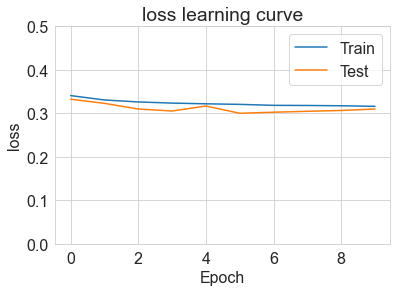

In [25]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,0.5)
plt.title('loss learning curve')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

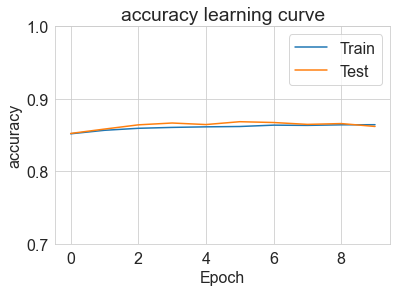

In [26]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.7,1)
plt.title('accuracy learning curve')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

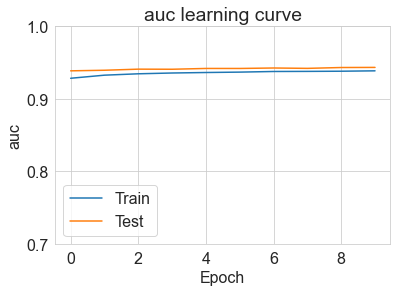

In [27]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.ylim(0.7,1)
plt.title('auc learning curve')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Keras Classifier

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier

In [29]:
def create_model(nn1=100, nn2=50, activation='relu', optimizer='sgd'):
    # Create model
    model = Sequential()
    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model.add(Dense(nn1, activation=activation, input_shape=(10,)))
    model.add(BatchNormalization())
    model.add(Dense(nn2, activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    return model

In [30]:
y_train.value_counts()

0.0    96088
1.0    96088
Name: label, dtype: int64

In [31]:
y_test.value_counts()

1.0    119479
0.0     41181
Name: label, dtype: int64

In [32]:
NN = KerasClassifier(build_fn = create_model, epochs=10, batch_size=32, verbose=0)

In [34]:
NN.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=2)

Epoch 1/10
6006/6006 - 9s - loss: 0.3629 - accuracy: 0.8380 - auc: 0.9182 - val_loss: 0.3199 - val_accuracy: 0.8608 - val_auc: 0.9365
Epoch 2/10
6006/6006 - 8s - loss: 0.3380 - accuracy: 0.8525 - auc: 0.9295 - val_loss: 0.3219 - val_accuracy: 0.8543 - val_auc: 0.9400
Epoch 3/10
6006/6006 - 8s - loss: 0.3305 - accuracy: 0.8571 - auc: 0.9327 - val_loss: 0.3102 - val_accuracy: 0.8652 - val_auc: 0.9412
Epoch 4/10
6006/6006 - 8s - loss: 0.3256 - accuracy: 0.8596 - auc: 0.9348 - val_loss: 0.3108 - val_accuracy: 0.8622 - val_auc: 0.9420
Epoch 5/10
6006/6006 - 8s - loss: 0.3237 - accuracy: 0.8605 - auc: 0.9356 - val_loss: 0.3291 - val_accuracy: 0.8529 - val_auc: 0.9413
Epoch 6/10
6006/6006 - 8s - loss: 0.3207 - accuracy: 0.8609 - auc: 0.9368 - val_loss: 0.3036 - val_accuracy: 0.8661 - val_auc: 0.9421
Epoch 7/10
6006/6006 - 8s - loss: 0.3206 - accuracy: 0.8622 - auc: 0.9368 - val_loss: 0.3145 - val_accuracy: 0.8622 - val_auc: 0.9428
Epoch 8/10
6006/6006 - 8s - loss: 0.3186 - accuracy: 0.8625 - 

# Feature importance

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(NN, X_test, y_test, random_state=42, scoring='accuracy')

In [ ]:
result.importances_mean

In [ ]:
result.importances_std

In [ ]:
result.importances

In [ ]:
featimp = pd.DataFrame(result.importances_mean, columns=['importances_mean'])
featimp['feature_name']=input_columns
featimp

In [ ]:
plt.rcParams.update({'font.size': 16})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="importances_mean", y="feature_name", data=featimp)

# Hyperparameter optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'node1':[50, 100, 200],
              'node2':[25, 50, 100], 
              'activation':['relu', 'tanh', 'softplus'], 
              'optimizer':['adam', 'sgd', 'rmsprop']
             }

model_cv = GridSearchCV(estimator=NN, param_grid=param_grid, scoring='accuracy', verbose=0)
model_cv.fit(undersampled_X_train, undersampled_y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

gs_result = pd.DataFrame(model_cv.cv_results_)

In [42]:
params = dict(optimizer=['sgd','adam','rmsprop'], batch_size=[8,16,32], activation=['relu','tanh'])

In [43]:
print(f"n_combination : {3*3*2}")

n_combination : 18


In [44]:
random_search = RandomizedSearchCV(estimator=NN, param_distributions=params, cv=5, verbose=2)
random_search_results = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....activation=relu, batch_size=32, optimizer=adam; total time=  51.8s
[CV] END .....activation=relu, batch_size=32, optimizer=adam; total time=  51.0s
[CV] END .....activation=relu, batch_size=32, optimizer=adam; total time=  53.3s
[CV] END .....activation=relu, batch_size=32, optimizer=adam; total time=  51.2s
[CV] END .....activation=relu, batch_size=32, optimizer=adam; total time=  56.9s
[CV] END ......activation=tanh, batch_size=32, optimizer=sgd; total time=  59.5s
[CV] END ......activation=tanh, batch_size=32, optimizer=sgd; total time=  48.5s
[CV] END ......activation=tanh, batch_size=32, optimizer=sgd; total time= 1.1min
[CV] END ......activation=tanh, batch_size=32, optimizer=sgd; total time=  53.2s
[CV] END ......activation=tanh, batch_size=32, optimizer=sgd; total time=  45.5s
[CV] END ......activation=relu, batch_size=8, optimizer=adam; total time= 3.8min
[CV] END ......activation=relu, batch_size=8, op

### Gridseardcv result 

In [46]:
random_search_results

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023BC4651EE0>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [8, 16, 32],
                                        'optimizer': ['sgd', 'adam',
                                                      'rmsprop']},
                   verbose=2)

In [47]:
gs_result = pd.DataFrame(random_search.cv_results_)

In [48]:
gs_result.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,param_batch_size,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,225.238152,5.781075,3.067466,0.423679,adam,8,relu,"{'optimizer': 'adam', 'batch_size': 8, 'activa...",0.866219,0.841811,0.860544,0.832653,0.775881,0.835422,0.032166,1
0,52.040807,2.086004,0.878133,0.102026,adam,32,relu,"{'optimizer': 'adam', 'batch_size': 32, 'activ...",0.847929,0.819748,0.868427,0.814518,0.826018,0.835328,0.020084,2
3,220.220616,9.202499,3.039607,0.342655,rmsprop,8,relu,"{'optimizer': 'rmsprop', 'batch_size': 8, 'act...",0.867754,0.853207,0.866216,0.771328,0.802420,0.832185,0.038613,3
1,53.295432,6.829796,0.992589,0.141548,sgd,32,tanh,"{'optimizer': 'sgd', 'batch_size': 32, 'activa...",0.822770,0.830727,0.863354,0.805334,0.819305,0.828298,0.019358,4
6,119.063896,4.182997,1.745714,0.297585,adam,16,relu,"{'optimizer': 'adam', 'batch_size': 16, 'activ...",0.798444,0.847613,0.869312,0.819513,0.799610,0.826898,0.027701,5
9,164.494530,3.831899,2.664496,0.066413,sgd,8,relu,"{'optimizer': 'sgd', 'batch_size': 8, 'activat...",0.829535,0.844621,0.864212,0.777260,0.802602,0.823646,0.030707,6
8,117.645456,33.419430,1.610332,0.102985,sgd,16,relu,"{'optimizer': 'sgd', 'batch_size': 16, 'activa...",0.809449,0.822662,0.868401,0.791908,0.814232,0.821331,0.025592,7
4,231.548838,8.703202,3.116172,0.284289,adam,8,tanh,"{'optimizer': 'adam', 'batch_size': 8, 'activa...",0.777006,0.796358,0.867178,0.826044,0.822610,0.817839,0.030507,8
7,60.108841,7.092608,1.019116,0.171296,rmsprop,32,tanh,"{'optimizer': 'rmsprop', 'batch_size': 32, 'ac...",0.814835,0.799922,0.866086,0.797554,0.804917,0.816663,0.025414,9
5,113.376309,6.834385,1.756894,0.196118,rmsprop,16,tanh,"{'optimizer': 'rmsprop', 'batch_size': 16, 'ac...",0.779582,0.801899,0.868323,0.824483,0.769065,0.808670,0.035409,10


# Try new set of hyperparameter

In [64]:
model_1 = create_model(activation='relu', optimizer='adam')

In [65]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping], batch_size=32, verbose=2)

Epoch 1/10
6006/6006 - 28s - loss: 0.3421 - accuracy: 0.8501 - auc: 0.9278 - val_loss: 0.3120 - val_accuracy: 0.8619 - val_auc: 0.9416
Epoch 2/10
6006/6006 - 35s - loss: 0.3233 - accuracy: 0.8607 - auc: 0.9358 - val_loss: 0.3154 - val_accuracy: 0.8625 - val_auc: 0.9426
Epoch 3/10
6006/6006 - 36s - loss: 0.3197 - accuracy: 0.8629 - auc: 0.9372 - val_loss: 0.3240 - val_accuracy: 0.8548 - val_auc: 0.9433
Epoch 4/10
6006/6006 - 36s - loss: 0.3170 - accuracy: 0.8632 - auc: 0.9383 - val_loss: 0.2974 - val_accuracy: 0.8720 - val_auc: 0.9433
Epoch 5/10
6006/6006 - 32s - loss: 0.3158 - accuracy: 0.8643 - auc: 0.9388 - val_loss: 0.3084 - val_accuracy: 0.8637 - val_auc: 0.9441
Epoch 6/10
6006/6006 - 34s - loss: 0.3146 - accuracy: 0.8648 - auc: 0.9392 - val_loss: 0.3071 - val_accuracy: 0.8680 - val_auc: 0.9436
Epoch 7/10
6006/6006 - 34s - loss: 0.3135 - accuracy: 0.8655 - auc: 0.9397 - val_loss: 0.3122 - val_accuracy: 0.8615 - val_auc: 0.9438
Epoch 8/10
6006/6006 - 34s - loss: 0.3131 - accuracy: 0

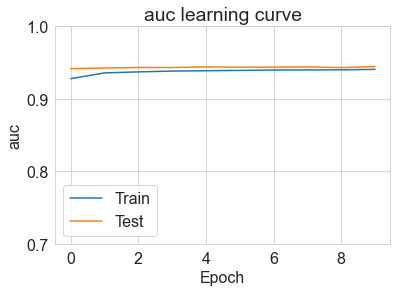

In [68]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(history_1.history['auc'])
plt.plot(history_1.history['val_auc'])
plt.ylim(0.7,1)
plt.title('auc learning curve')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Boosted Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(undersampled_X_train.values, undersampled_y_train.values)

In [ ]:
BDT = AdaBoostClassifier(base_estimator=clf, n_estimators=100)

In [ ]:
BDT.fit(undersampled_X_train.values, undersampled_y_train.values)

In [ ]:
y_pred = BDT.predict(X_test.values)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
BDT.feature_importances_

In [ ]:
feat_imp_BDT = pd.DataFrame(BDT.feature_importances_, columns=['feature importance'])

In [ ]:
feat_imp_BDT['feature_name']= input_columns

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="feature_name", x="feature importance", data=feat_imp_BDT)

In [ ]:
BDT.fit(X_train_new.values, y_train_new.values)

In [ ]:
y_pred_new = BDT.predict(X_test_new.values)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_new))

# ROC curve

In [59]:
from sklearn.metrics import roc_curve

In [62]:
from sklearn import metrics

In [ ]:
def plot_roc(y_pred1, y_pred2, est1, est2):
    fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    plt.plot(fpr1, tpr1)
    plt.plot(fpr2, tpr2)
    display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name= est1)
    display1.plot()
    display2 = metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name= est2)
    display2.plot()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

In [ ]:
plot_roc(y_pred, y_pred_proba, 'Neural Network', 'Boosted Decision Tree')

In [ ]:
y_pred_prob_NN = model.predict(X_test.values)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_NN)

y_pred_prob_BDT = BDT.predict_proba(X_test.values)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob_BDT)

roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"Neural Network AUC = {roc_auc1 :.3f}")
plt.plot(fpr2, tpr2, label= f"Boosted Decision Tree AUC = {roc_auc2 :.3f}")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic [ROC curve]')
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic [ROC curve]')

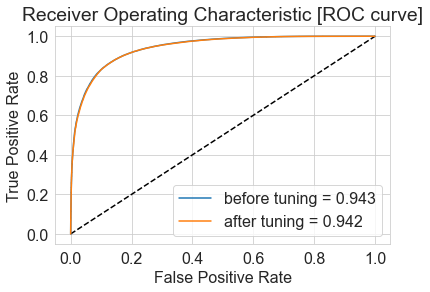

In [63]:
y_pred_model0 = model.predict(X_test.values)
fpr0 , tpr0, thresholds0 = roc_curve(y_test, y_pred_model0)

y_pred_model1 = model_1.predict(X_test.values)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_model1)

roc_auc0 = metrics.auc(fpr0, tpr0)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr0, tpr0, label= f"before tuning = {roc_auc0 :.3f}")
plt.plot(fpr1, tpr1, label= f"after tuning = {roc_auc1 :.3f}")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic [ROC curve]')